In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [24]:
income = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\adult.csv\\adult.csv")
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Let us now look at the qualities of the data, and clean out the special characters so we can replace them with mode, and replace the two values of income with 0 and 1.

In [25]:
print(f"Number of rows : {income.shape[0]}")
print(f"Number of columns : {income.shape[1]}")

Number of rows : 48842
Number of columns : 15


In [26]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


The Data looks clean however we see special characters in some of the columns. 

In [27]:
income.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Since about 5% of the values are missing from "Workclass" and  "native-country" of the columns and about 2 percent from "Occupation" column, we will replace the special character with NaN and fill the missing calues with Mode. 

In [28]:
income['workclass'] = income['workclass'].replace('?', np.nan)
income['occupation'] = income['occupation'].replace('?', np.nan)
income['native-country'] = income['native-country'].replace('?', np.nan)

In [29]:
income.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [30]:
income.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [35]:
income['native-country'].fillna(income['native-country'].mode()[0],inplace = True)
income['workclass'].fillna(income['workclass'].mode()[0],inplace = True)
income['occupation'].fillna(income['occupation'].mode()[0],inplace = True)


In [36]:
income.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [38]:
income['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [53]:
income['income'].replace(['<=50K', '>50K'], [0, 1], inplace=True)

In [54]:
income['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

Q). What can we learn about the income status given a persons age? At what age are people successful the most?

In [71]:
pd.DataFrame(income.groupby('age')['income'].mean().sort_values(ascending= False)).head(10)

,income
age,
50,0.430716
53,0.405063
46,0.400182
51,0.399088
47,0.396855
48,0.395266
54,0.393148
44,0.382381
45,0.375912


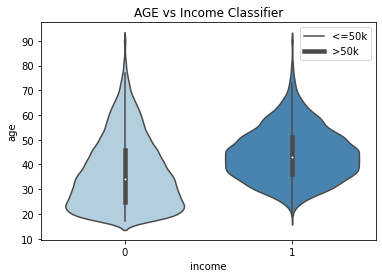

In [66]:
import matplotlib.patches as mpatches

sns.violinplot(x="income", y="age", data=income, size=10, palette="Blues")
plt.title('AGE vs Income Classifier')


plt.legend(['<=50k','>50k'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

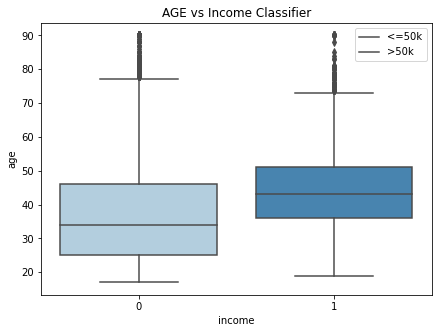

In [86]:
#Box plots
#--------------------------------------------------------------------------------
fig = plt.figure(figsize=(7,5))
sns.boxplot(x='income',y='age',data=df, palette="Blues").set_title('AGE vs Income Classifier')

plt.legend(['<=50k','>50k'], loc=1)
plt.show

Age 50 is where a person is the most successful based only on income. We can see that disproportion in age, people who make more than 50k usually tend be older than people who are not. The mean for class 0 (<50k) is age 33 whereas class 1 (>50k) is 44.

We expect people with higher education to make more, however let the data tell us that. Q) Do the people with higher education make more?

In [74]:
pd.DataFrame(income['education'].value_counts()).style.bar(color='aquamarine')

,education
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955
Prof-school,834


In [78]:
pd.DataFrame(income.groupby('education')['income'].mean().sort_values(ascending= False)).head(5)

,income
education,
Prof-school,0.739808
Doctorate,0.725589
Masters,0.549116
Bachelors,0.412835
Assoc-acdm,0.257964


In [81]:
pd.DataFrame(income.groupby('education')['income'].mean().sort_values(ascending= False)).tail(7)

,income
education,
7th-8th,0.064921
10th,0.062635
9th,0.054233
5th-6th,0.053045
11th,0.050773
1st-4th,0.032389
Preschool,0.012048


In [110]:
some_values = ['Prof-school', 'Doctorate', 'Masters', 'Bachelors', 'Assoc-acdm']

pay_disparity = income.loc[income['education'].isin(some_values)]

In [111]:
pd.DataFrame(pay_disparity.groupby(['gender', 'education'])['income'].mean())

income
gender education            
Female Assoc-acdm   0.137161
       Bachelors    0.210335
       Doctorate    0.566372
       Masters      0.343195
       Prof-school  0.477273
Male   Assoc-acdm   0.335729
       Bachelors    0.503244
       Doctorate    0.762994
       Masters      0.645143
       Prof-school  0.789174

In [113]:
income.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.303767
Female    0.109251
Name: income, dtype: float64

We learn a couple of things, a lot of people are from highschool in our data, however as expected, people with higher education (Associates Degree & up) make far more than people with less education or none at all. We also learn that we have pay disparity between genders. Men with higher education tend to make a lot more than their female counterparts.

Q) Examine the relationship between race and income.

In [89]:
pd.DataFrame(income['race'].value_counts()).style.bar(color='orange')

,race
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [72]:
pd.DataFrame(income.groupby('race')['income'].mean().sort_values(ascending= False)).head(10)

,income
race,
Asian-Pac-Islander,0.269256
White,0.253987
Other,0.123153
Black,0.120811
Amer-Indian-Eskimo,0.117021


In [117]:
income.groupby(['race','income']).size().reset_index(name='count')

,race,income,count
0,Amer-Indian-Eskimo,0,415
1,Amer-Indian-Eskimo,1,55
2,Asian-Pac-Islander,0,1110
3,Asian-Pac-Islander,1,409
4,Black,0,4119
5,Black,1,566
6,Other,0,356
7,Other,1,50
8,White,0,31155
9,White,1,10607


I do not agree to the result where it says Asian-Pac-Islander make more than their white counterparts. Only 55 out of 415 (13%) make more than 50k, where as almost(33%) of white population makes more than  50k. This can also be the case of unsampled data and having one category repeating more times than the other. 

Q) Which Workclass makes the most income?

In [92]:
pd.DataFrame(income['workclass'].value_counts()).style.bar(color='aquamarine')

,workclass
Private,36705
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [94]:
income.groupby('workclass')['income'].mean().sort_values(ascending= False).head(6)

workclass
Self-emp-inc        0.553392
Federal-gov         0.391760
Local-gov           0.295599
Self-emp-not-inc    0.278871
State-gov           0.267542
Private             0.208473
Name: income, dtype: float64

In [123]:
income.groupby(['workclass','income']).size().reset_index(name='count')

,workclass,income,count
0,Federal-gov,0,871
1,Federal-gov,1,561
2,Local-gov,0,2209
3,Local-gov,1,927
4,Never-worked,0,10
5,Private,0,29053
6,Private,1,7652
7,Self-emp-inc,0,757
8,Self-emp-inc,1,938
9,Self-emp-not-inc,0,2785


We see that federal government provides a safety net for salary (you can't just get fired) hence why we see a good proportion of federal employees making more than 50k. However, self-employed people with an incorporation have a better proportion of making more than 50k (more people make more than 50k (938) than less than  50k (757)) hence why the proportion is more than 50k. 

In [98]:
import plotly.express as plotly

plotly.pie(income, names = 'gender', title='distribution by gender')

In [99]:
income['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [124]:
income.groupby(['gender', 'workclass','income']).size().reset_index(name='count')

,gender,workclass,income,count
0,Female,Federal-gov,0,369
1,Female,Federal-gov,1,83
2,Female,Local-gov,0,1031
3,Female,Local-gov,1,227
4,Female,Never-worked,0,3
5,Female,Private,0,11699
6,Female,Private,1,1170
7,Female,Self-emp-inc,0,147
8,Female,Self-emp-inc,1,64
9,Female,Self-emp-not-inc,0,505


We can already see pay disparity here, especially in the private sector. Only 10% of females make more than 50k, whereas more than 33% men make more in private sector. Same is the case in federal companies. 

In [126]:
income.groupby('relationship')['income'].mean().sort_values(ascending= False)

relationship
Wife              0.468897
Husband           0.448671
Not-in-family     0.101407
Unmarried         0.060293
Other-relative    0.034529
Own-child         0.014642
Name: income, dtype: float64

In [127]:
pd.DataFrame(income['relationship'].value_counts()).style.bar(color='orange')

,relationship
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


Given that almost 40% of the population consists of husband, yet they still make more than 50k in more than 44% of the cases. This is an example of how EDA can sometimes be misleading hence exploring the data more is always the make sure our answers are correct and accurate. 

In Summary:

- We make sure the obvious fact, that is people with higher education are more successful financially than people who do not have higher education.
- We found age 50 to be the most successful amongst all, and in most cases people above 36 make more than 50k.
- We find that the race variable is heavily skewed towards white. 
- There is a pay disparity between Male and Female in general and especially in federal and private sectors. 
- Couples (Husband or Wife) make more than people who are single. 